<a href="https://colab.research.google.com/github/Bharathisenthilkumar/bharathi/blob/main/mltask_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: Predict Restaurant Ratings

Importing python libraries and datasets

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





Data analytics:

In [28]:
dataset = pd.read_csv('/content/Dataset .csv')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [30]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [31]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [32]:
dataset['Cuisines'].fillna(dataset['Cuisines'].median,inplace=True)

In [33]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [34]:
dataset.shape

(9551, 21)

In [35]:
dataset.duplicated().sum()

0

In [36]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

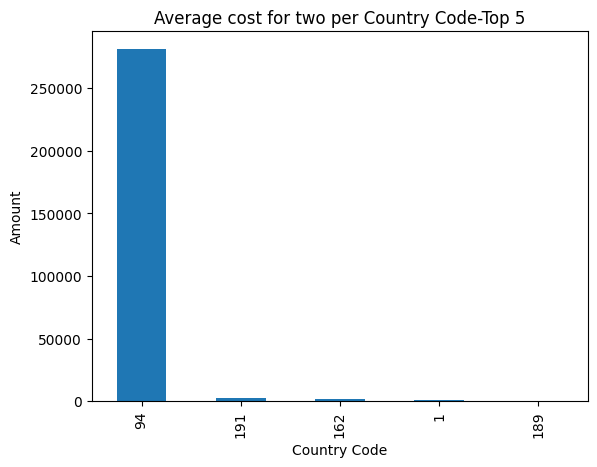

In [37]:
dataset.groupby("Country Code")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Average cost for two per Country Code-Top 5")
plt.xlabel("Country Code")
plt.ylabel("Amount")
plt.show()

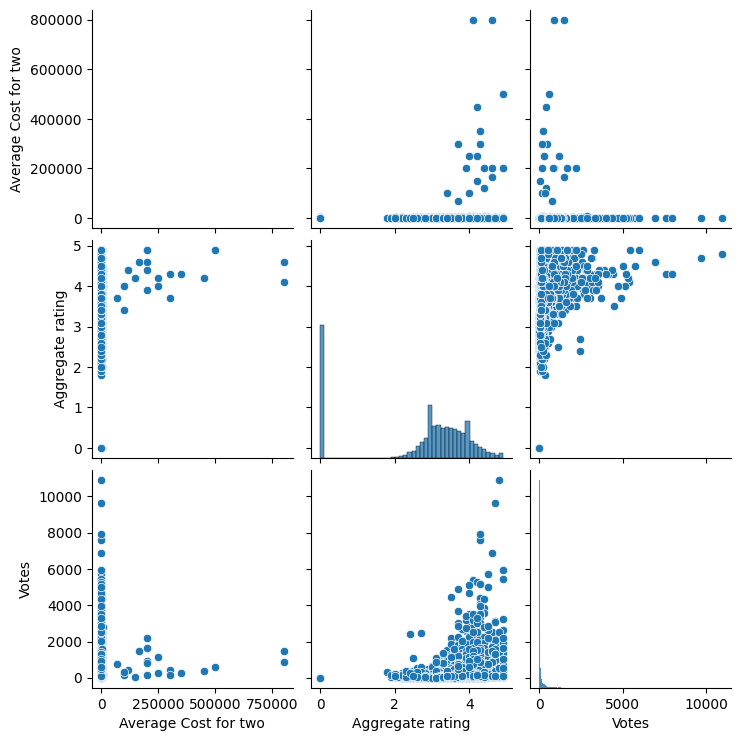

In [38]:
data=dataset.groupby("Cuisines")["Votes"].sum().reset_index()
sns.pairplot(dataset[["Average Cost for two","Aggregate rating","Votes"]])

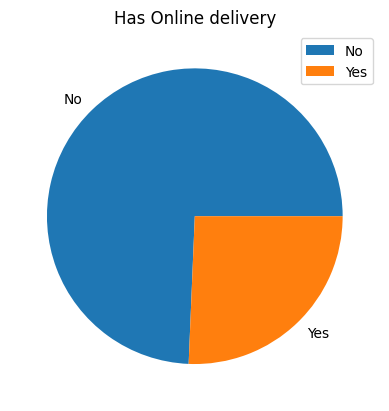

In [39]:
dataset["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Has Online delivery")
plt.ylabel("")
plt.legend()
plt.show()

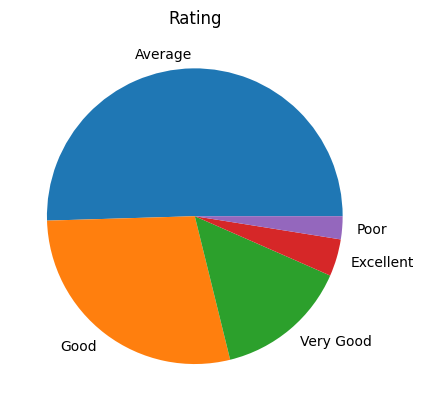

In [40]:
dataset=dataset[dataset["Rating text"] != "Not rated"]
dataset["Rating text"].value_counts().plot(kind="pie")
plt.title("Rating")
plt.ylabel("")
plt.show()

Data Preprocessing:

In [41]:
categorical_columns = ['Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in categorical_columns:
    if any(callable(item) for item in dataset[col]):
        print(f"Warning: Column '{col}' contains methods. Converting them to strings.")
        dataset[col] = dataset[col].astype(str)
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
dataset

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",168,169,121.027535,14.565443,871,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",581,589,121.014101,14.553708,1054,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",303,309,121.056831,14.581404,1578,...,0,1,0,0,0,4,4.4,1,4,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",843,856,121.056475,14.585318,1069,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",843,856,121.057508,14.584450,1065,...,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",506,512,28.977392,41.022793,1705,...,11,0,0,0,0,3,4.1,1,4,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",540,546,29.041297,41.009847,1715,...,11,0,0,0,0,3,4.2,1,4,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",542,549,29.034640,41.055817,1053,...,11,0,0,0,0,4,3.7,4,2,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",542,549,29.036019,41.057979,1564,...,11,0,0,0,0,4,4.0,1,4,901


In [42]:
columns_to_remove = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Longitude', 'Latitude']
existing_columns = dataset.columns

for col in columns_to_remove:
    if col in existing_columns:
        dataset.drop(columns=col, inplace=True)
        print(f"Removed column: {col}")
dataset

Removed column: Restaurant ID
Removed column: Restaurant Name
Removed column: Country Code
Removed column: City
Removed column: Address
Removed column: Longitude
Removed column: Latitude


,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,168,169,871,1100,0,1,0,0,0,3,4.8,0,1,314
1,581,589,1054,1200,0,1,0,0,0,3,4.5,0,1,591
2,303,309,1578,4000,0,1,0,0,0,4,4.4,1,4,270
3,843,856,1069,1500,0,0,0,0,0,4,4.9,0,1,365
4,843,856,1065,1500,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,506,512,1705,80,11,0,0,0,0,3,4.1,1,4,788
9547,540,546,1715,105,11,0,0,0,0,3,4.2,1,4,1034
9548,542,549,1053,170,11,0,0,0,0,4,3.7,4,2,661
9549,542,549,1564,120,11,0,0,0,0,4,4.0,1,4,901


Data splitting

In [43]:
x = dataset.drop(columns=['Aggregate rating'])
y = dataset['Aggregate rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)



Machine learning Model:
Random forest regression

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
rfmodel=RandomForestRegressor()
param_gridrf={
    "max_depth": [5,20],
    "n_estimators":[2,5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf=GridSearchCV(estimator=rfmodel,param_grid=param_gridrf)
grid_rf.fit(x_train,y_train)
print(f"Best Parameters: {grid_rf.best_params_}")
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
Mean Squared Error: 0.04044421343889167


Machine learning Model Evaluation

In [45]:
y_pred = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
feature_importances = pd.DataFrame(best_rf.feature_importances_, index=x.columns, columns=['Importance'])
print(feature_importances.sort_values(by='Importance', ascending=False))



Mean Squared Error: 0.04044421343889167
R-squared: 0.8645242820251053
                      Importance
Rating color            0.951295
Rating text             0.034126
Votes                   0.009833
Average Cost for two    0.001719
Cuisines                0.001672
Has Online delivery     0.000552
Price range             0.000372
Currency                0.000252
Locality                0.000153
Locality Verbose        0.000027
Has Table booking       0.000000
Is delivering now       0.000000
Switch to order menu    0.000000


Feature importance:

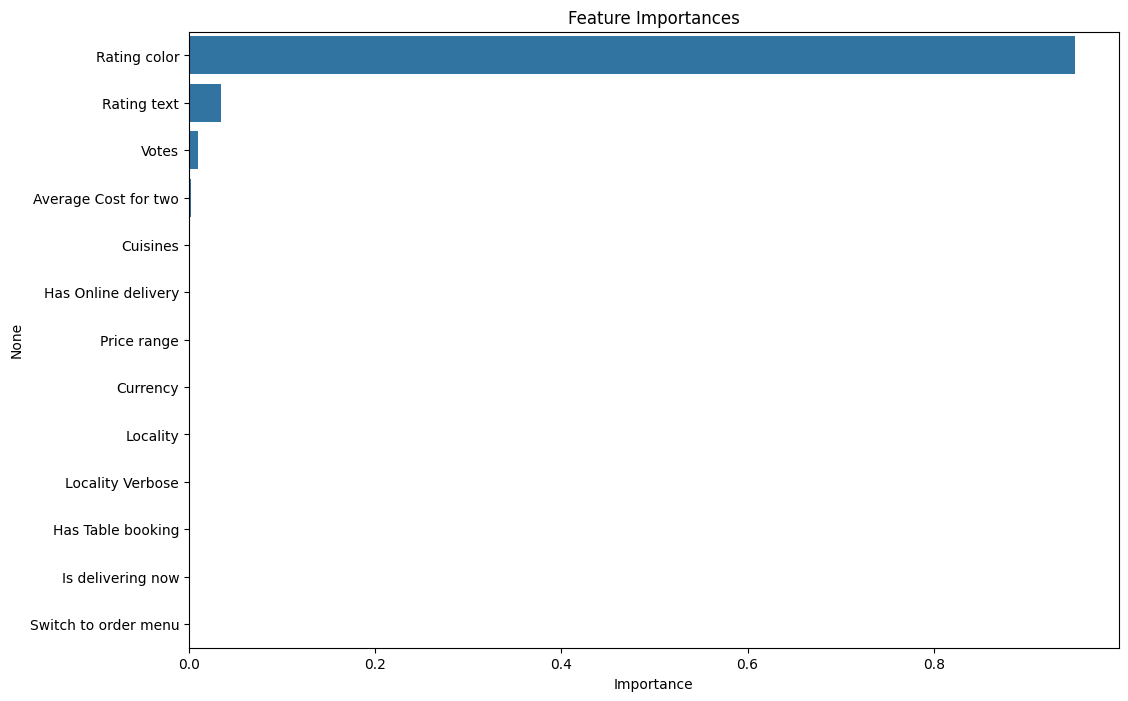

In [49]:
plt.figure(figsize=(12, 8))
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)
sns.barplot(x=sorted_importances.Importance, y=sorted_importances.index)
plt.title('Feature Importances')
plt.show()